In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [4]:
import h5py
from tqdm import tqdm_notebook

In [5]:
X = []
with h5py.File('data/genotype_2bit_by_sample/0-500', 'r') as f:
    for key in f.keys():
        X.append(np.expand_dims(f[key][:], axis=0))
X = np.concatenate(X, axis=0)

In [7]:
# swap alleles such that odd features are major alleles and even features are minor allens
allele_freq = X.sum(axis=0)
ind = np.nonzero(np.repeat((allele_freq[0::2] - allele_freq[1::2] < 0), 2))[0]
rev_ind = ind.reshape((-1, 2))[:, ::-1].reshape((-1))
X_rev = np.take(X, ind, axis=1)
X[:, rev_ind] = X_rev
allele_freq = X.sum(axis=0)

In [28]:
genotype_freq_00 = np.sum(np.logical_and(X[:, 0::2] == 0, X[:, 1::2] == 0), axis=1)
genotype_freq_10 = np.sum(np.logical_and(X[:, 0::2] == 1, X[:, 1::2] == 0), axis=1)
genotype_freq_01 = np.sum(np.logical_and(X[:, 0::2] == 0, X[:, 1::2] == 1), axis=1)
genotype_freq_11 = np.sum(np.logical_and(X[:, 0::2] == 1, X[:, 1::2] == 1), axis=1)
print('genotype freq (00): %.1f'%genotype_freq_00.mean())
print('genotype freq (10): %.1f'%genotype_freq_10.mean())
print('genotype freq (01): %.1f'%genotype_freq_01.mean())
print('genotype freq (11): %.1f'%genotype_freq_11.mean())

genotype freq (00): 0.0
genotype freq (10): 1788578.6
genotype freq (01): 1491.2
genotype freq (11): 103049.1


In [27]:
genotype_freq_11.shape

(500,)

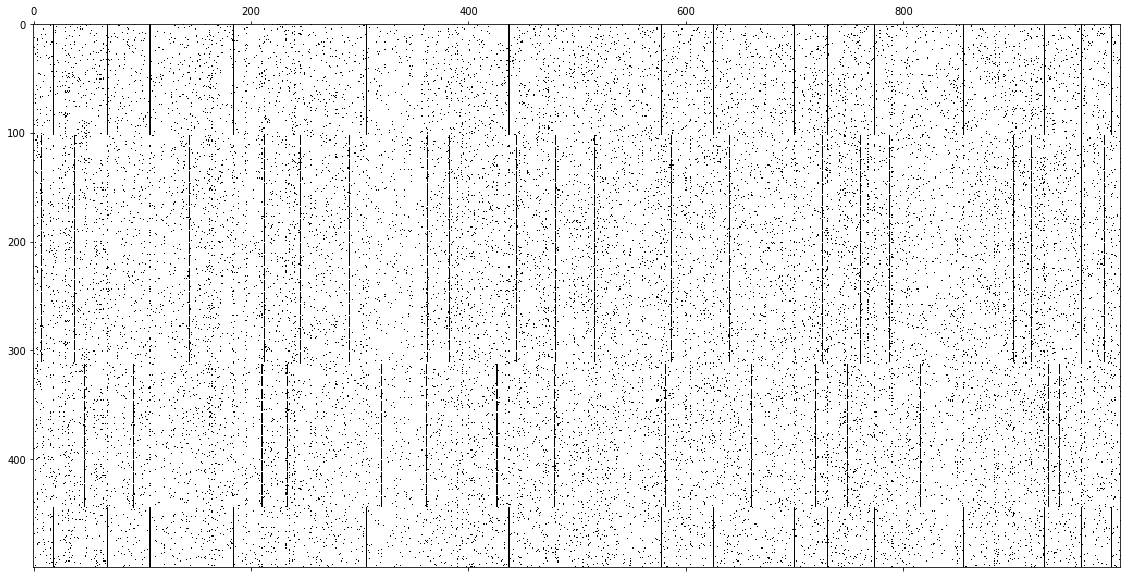

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.matshow(X[:, 1:2000:2], cmap=cm.Greys)

In [12]:
np.unique(allele_freq[0::2], return_counts=True)

(array([380, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
        396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
        409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
        422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434,
        435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447,
        448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460,
        461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473,
        474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
        487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500]),
 array([      2,       2,       2,       3,       1,       2,       1,
              1,       1,       2,       1,       2,       2,       1,
              3,       2,       1,       1,       2,       4,       4,
              2,       2,       3,       3,       3,       3,       8,
              4,       6,      10,       7,       6,

In [13]:
np.unique(allele_freq[1::2], return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177